In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [4]:
fashion_mnist=tf.keras.datasets.fashion_mnist
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()
x_train,x_test=x_train/255.0,x_test/255.0
print("x_train shape:",x_train.shape)

4422102/4422102 [==============================] - 10s 2us/step
x_train shape: (60000, 28, 28)


In [5]:
x_train=np.expand_dims(x_train, -1)
x_test=np.expand_dims(x_test,-1)
print(x_train.shape)

(60000, 28, 28, 1)


here we expanded the dimension coz the input to the cnn is N*H*W*C and here we dont color input in fashion data coz its a gray image so we add 1 in the end

In [6]:
k=len(set(y_train))
print("number of classes:",k)

number of classes: 10


In [9]:
i=Input(shape=x_train[0].shape)
x=Conv2D(32,(3,3),strides=2,activation='relu')(i)
x=Conv2D(64,(3,3),strides=2,activation='relu')(x)
x=Conv2D(128,(3,3),strides=2,activation='relu')(x)
x=Flatten()(x)
x=Dropout(0.2)(x)
x=Dense(512,activation='relu')(x)
x=Dropout(0.2)(x)
x=Dense(k,activation="softmax")(x)
model=Model(i, x)

In [10]:
#compile and fit
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
r=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=20)


Epoch 1/20
1875/1875 [==============================] - 34s 9ms/step - loss: 0.5206 - accuracy: 0.8069 - val_loss: 0.4022 - val_accuracy: 0.8493
Epoch 2/20
1875/1875 [==============================] - 16s 8ms/step - loss: 0.3588 - accuracy: 0.8644 - val_loss: 0.3461 - val_accuracy: 0.8729
Epoch 3/20
1875/1875 [==============================] - 16s 8ms/step - loss: 0.3080 - accuracy: 0.8839 - val_loss: 0.3061 - val_accuracy: 0.8865
Epoch 4/20
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2746 - accuracy: 0.8955 - val_loss: 0.2969 - val_accuracy: 0.8905
Epoch 5/20
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2478 - accuracy: 0.9061 - val_loss: 0.3099 - val_accuracy: 0.8909
Epoch 6/20
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2247 - accuracy: 0.9138 - val_loss: 0.2923 - val_accuracy: 0.8927
Epoch 7/20
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2074 - accuracy: 0.9218 - val_loss: 0.2934 - val_ac

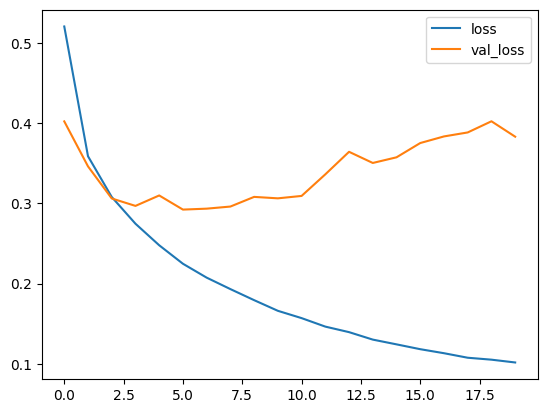

In [11]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

the model is overfitting a bit coz the validation loss is going up slightly

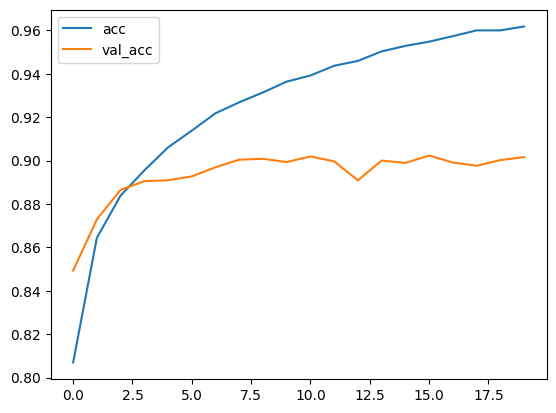

In [12]:
plt.plot(r.history['accuracy'],label='acc')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.legend()

here the validation acc stays steady but the validation loss is going up a bit this could possibly mean that the model is becoming confident in the incorrect prediction as the precition gets incorrect the loss gets bigger and bigger.

313/313 [==============================] - 1s 1ms/step
Confusion matrix, without normalization
[[852   0  36  18   3   3  82   0   6   0]
 [  1 972   2  16   3   0   5   0   1   0]
 [ 11   0 875  14  36   0  62   0   2   0]
 [ 13   8  21 914  29   1  14   0   0   0]
 [  0   2  74  24 821   0  79   0   0   0]
 [  0   0   0   2   0 965   0  23   2   8]
 [100   1  74  23  73   0 722   0   7   0]
 [  0   0   0   0   0   5   0 970   0  25]
 [  1   0   8   6   4   1   7   3 970   0]
 [  0   0   0   0   0   8   1  36   0 955]]


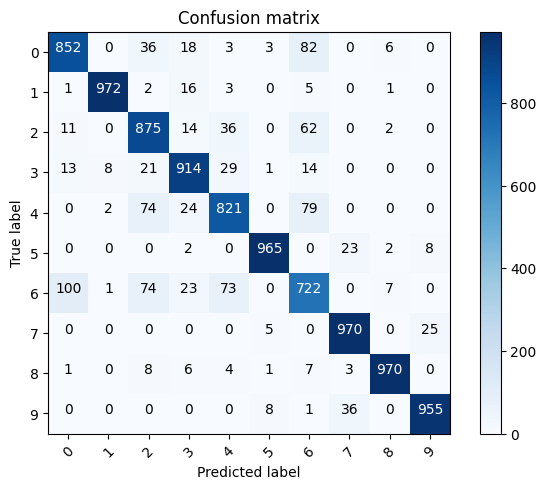

In [13]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [14]:
# Label mapping
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split("\n")

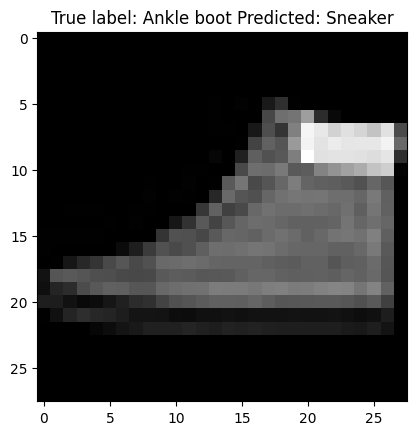

In [23]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));